# Baseline Model

## Libraries, Modules, Functions

In [29]:
import os
import sys
import warnings
import matplotlib.pyplot as plt
module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)

RANDOM_STATE = 101
warnings.simplefilter('ignore')

## ETL

In [3]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True)

In [4]:
y = y.astype(np.uint8)

## Data

In [10]:
some_digit = X.loc[0]
some_digit_image = some_digit.values.reshape(28,28)

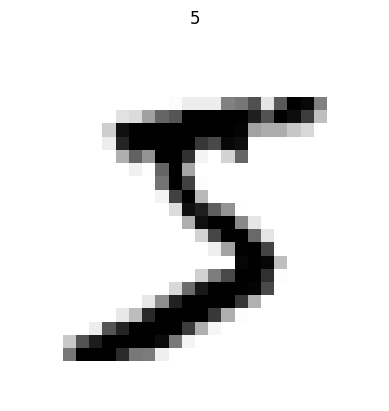

In [11]:
plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.title(y[0])
plt.show()

What other labels do `y` have?

In [12]:
y.unique()

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8], dtype=uint8)

But we need a 5-detector!

In [18]:
y = y==5

## Model 

In [13]:
from sklearn.linear_model  import SGDClassifier

In [19]:
sgd_clf = SGDClassifier(random_state=RANDOM_STATE, n_jobs=-1)

In [25]:
%%time
sgd_clf.fit(X,y)

CPU times: user 14.5 s, sys: 103 ms, total: 14.6 s
Wall time: 14.6 s


SGDClassifier(n_jobs=-1, random_state=101)

In [30]:
%%time
sgd_clf.predict([some_digit])

CPU times: user 1.47 ms, sys: 208 µs, total: 1.68 ms
Wall time: 1.57 ms


array([ True])

## Evaluation

In [53]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, classification_report

In [23]:
cross_val_score(sgd_clf, X, y, cv=3, scoring='accuracy')

array([0.96438673, 0.92709896, 0.95645652])

Close enough: 93% accuracy!

#### Confusion Matrix

In [32]:
y_pred = cross_val_predict(sgd_clf, X, y, cv=3)

In [34]:
confusion_matrix(y, y_pred)

array([[61433,  2254],
       [ 1294,  5019]])

### Precision - Recall curve

In [37]:
y_scores = cross_val_predict(sgd_clf, X, y, cv=3, method='decision_function')

In [38]:
precisions, recalls, thresholds = precision_recall_curve(y, y_scores)

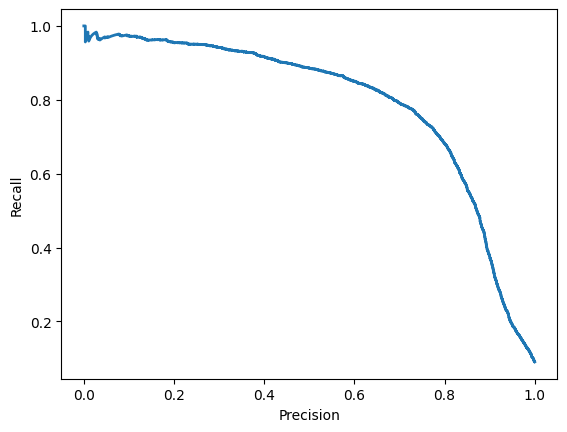

In [45]:
plt.plot(recalls[:-1], precisions[:-1], linewidth=2)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()

### ROC Curve

In [44]:
fpr, tpr, thresholds = roc_curve(y, y_scores)

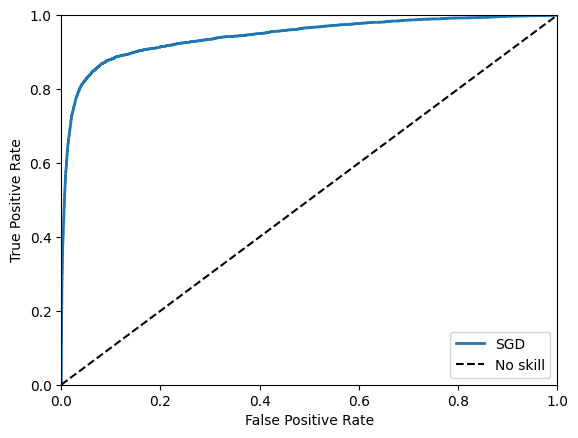

In [52]:
plt.plot(fpr, tpr, linewidth=2, label ='SGD')
plt.plot([0,1], [0,1], 'k--', label = 'No skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()
plt.show()

In [ ]:
print(classification_report(y, y_pred, target_names=['0','1']))